In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [51]:
df = pd.read_csv ('models/WS_FV_2021_1_24_13_34_34_top_bottom_both_complete_test_second_stage/performance.csv')
# print(df)


In [52]:
# a "CN" color spec, i.e. 'C' followed by a number, which is an index into the default property cycle (rcParams["axes.prop_cycle"] 

# (default: cycler('color', 
#['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', 
#'#e377c2', '#7f7f7f', '#bcbd22', '#17becf']))); 

# the indexing is intended to occur at rendering time, and defaults to black if the cycle does not include color.
# df = df.iloc[0:41,:]
df = df.iloc[41:81,:]
# df = df.iloc[0:241,:]  # 6k
print(df.columns)

Index(['epoch', 'time', 'training_cost', 'test_cost', 'shape_training_cost',
       'size_training_cost', 'color_training_cost', 'shape_test_cost',
       'size_test_cost', 'color_test_cost', 'shape_training_accuracy',
       'size_training_accuracy', 'color_training_accuracy',
       'shape_test_accuracy', 'size_test_accuracy', 'color_test_accuracy',
       'monomino_training_accuracy', 'domino_training_accuracy',
       'tromino1_training_accuracy', 'tromino2_training_accuracy',
       'tetromino1_training_accuracy', 'tetromino2_training_accuracy',
       'tetromino3_training_accuracy', 'tetromino4_training_accuracy',
       'tetromino5_training_accuracy', '1_training_accuracy',
       '2_training_accuracy', '3_training_accuracy', '4_training_accuracy',
       'black_training_accuracy', 'white_training_accuracy',
       'red_training_accuracy', 'blue_training_accuracy',
       'green_training_accuracy', 'yellow_training_accuracy',
       'cyan_training_accuracy', 'magenta_training_ac

In [53]:
######## 1000 epo ########
idx = []
# for i in range(41): # first half
#     idx.append(i * 25)

for i in range(40): # second half
    idx.append(i * 25)

df.insert(0, 'epochs', idx, allow_duplicates=False)


In [ ]:
idx = []
for i in range(241):  # 6k epo
    idx.append(i * 25)
# print(idx)

df.insert(0, 'epochs', idx, allow_duplicates=False)

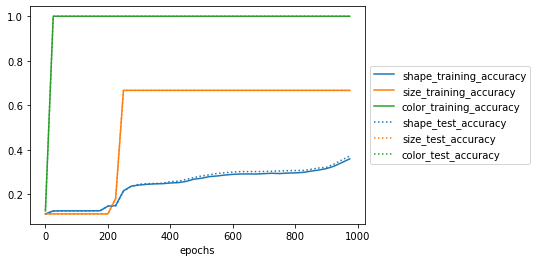

In [44]:
########### usual ############
datas = df[['epochs',"shape_training_accuracy", "size_training_accuracy", "color_training_accuracy", 
            "shape_test_accuracy", "size_test_accuracy","color_test_accuracy"]]

ax = plt.gca()
datas.plot(kind='line',x='epochs',y='shape_training_accuracy', color='#1f77b4', ax = ax)
datas.plot(kind='line',x='epochs',y='size_training_accuracy', color='#ff7f0e', ax = ax)
datas.plot(kind='line',x='epochs',y='color_training_accuracy', color='#2ca02c', ax = ax)

datas.plot(linestyle=':',x='epochs',y='shape_test_accuracy', color='#1f77b4', ax = ax)
datas.plot(linestyle=':',x='epochs',y='size_test_accuracy', color='#ff7f0e', ax = ax)
datas.plot(linestyle=':',x='epochs',y='color_test_accuracy', color='#2ca02c', ax = ax)

plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()
# plt.savefig('figures/1_complete_full_action_train_6k_line',bbox_inches='tight')
# plt.savefig('figures/1_complete_full_action_train_1k_line',bbox_inches='tight')
# plt.savefig('figures/2d_half_variant_train_first_test_omit_first_stage_line',bbox_inches='tight')
# plt.savefig('figures/3d_half_variant_train_second_test_omit_second_stage_line',bbox_inches='tight')


In [ ]:
############# omit shape ##################
non_tetro1_train = df.loc[: , ["monomino_training_accuracy", "domino_training_accuracy", "tromino1_training_accuracy", "tromino2_training_accuracy",
              "tetromino2_training_accuracy", "tetromino3_training_accuracy", "tetromino4_training_accuracy",
              "tetromino5_training_accuracy"]]
df['non_tetro1_train'] = non_tetro1_train.mean(axis=1)

non_tetro1_test = df.loc[: , ['monomino_test_accuracy', 'domino_test_accuracy',
       'tromino1_test_accuracy', 'tromino2_test_accuracy',
       'tetromino2_test_accuracy',
       'tetromino3_test_accuracy', 'tetromino4_test_accuracy',
       'tetromino5_test_accuracy']]
df['non_tetro1_test'] = non_tetro1_test.mean(axis=1)

ax = plt.gca()
df.plot(kind='line',x='epochs',y='non_tetro1_train', color='#1f77b4', ax = ax)
df.plot(kind='line',x='epochs',y='size_training_accuracy', color='#ff7f0e', ax = ax)
df.plot(kind='line',x='epochs',y='color_training_accuracy', color='#2ca02c', ax = ax)

df.plot(linestyle=':',x='epochs',y='non_tetro1_test', color='#1f77b4', ax = ax)
df.plot(linestyle=':',x='epochs',y='size_test_accuracy', color='#ff7f0e', ax = ax)
df.plot(linestyle=':',x='epochs',y='color_test_accuracy', color='#2ca02c', ax = ax)
df.plot(linestyle=':',x='epochs',y='tetromino1_test_accuracy', color='#d62728', ax = ax)

plt.show()
# plt.savefig('figures/2a_omit_one_shape_line')


In [ ]:
############# omit color ##################
non_black_train = df.loc[: , ['white_training_accuracy',
       'red_training_accuracy', 'blue_training_accuracy',
       'green_training_accuracy', 'yellow_training_accuracy',
       'cyan_training_accuracy', 'magenta_training_accuracy']]
df['non_black_train'] = non_black_train.mean(axis=1)

non_black_test = df.loc[: , ['white_test_accuracy', 'red_test_accuracy', 'blue_test_accuracy',
       'green_test_accuracy', 'yellow_test_accuracy', 'cyan_test_accuracy',
       'magenta_test_accuracy']]
df['non_black_test'] = non_black_test.mean(axis=1)

ax = plt.gca()
df.plot(kind='line',x='epochs',y='non_black_train', color='#2ca02c', ax = ax)
df.plot(kind='line',x='epochs',y='shape_training_accuracy', color='#1f77b4', ax = ax)
df.plot(kind='line',x='epochs',y='size_training_accuracy', color='#ff7f0e', ax = ax)

df.plot(linestyle=':',x='epochs',y='non_black_test', color='#2ca02c', ax = ax)
df.plot(linestyle=':',x='epochs',y='shape_test_accuracy', color='#1f77b4', ax = ax)
df.plot(linestyle=':',x='epochs',y='size_test_accuracy', color='#ff7f0e', ax = ax)
df.plot(linestyle=':',x='epochs',y='black_test_accuracy', color='#d62728', ax = ax)

plt.show()
# plt.savefig('figures/2b_omit_black_line')
# plt.savefig("figures/2b_omit_black_color_both_complete_first_train_line.png",bbox_inches='tight')



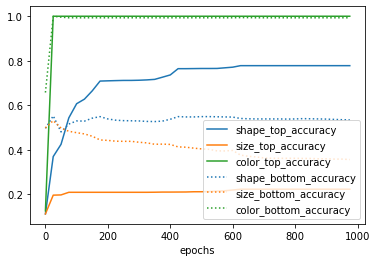

In [55]:
############# bottom vs. top ##############
datas = df[['epochs',"shape_training_accuracy", "size_training_accuracy", "color_training_accuracy", 
            "shape_test_accuracy", "size_test_accuracy","color_test_accuracy"]]

datas = datas.rename(columns={'shape_training_accuracy': 'shape_top_accuracy'})
datas = datas.rename(columns={'size_training_accuracy': 'size_top_accuracy'})
datas = datas.rename(columns={'color_training_accuracy': 'color_top_accuracy'})
datas = datas.rename(columns={'shape_test_accuracy': 'shape_bottom_accuracy'})
datas = datas.rename(columns={'size_test_accuracy': 'size_bottom_accuracy'})
datas = datas.rename(columns={'color_test_accuracy': 'color_bottom_accuracy'})

ax = plt.gca()
datas.plot(kind='line',x='epochs',y='shape_top_accuracy', color='#1f77b4', ax = ax)
datas.plot(kind='line',x='epochs',y='size_top_accuracy', color='#ff7f0e', ax = ax)
datas.plot(kind='line',x='epochs',y='color_top_accuracy', color='#2ca02c', ax = ax)

datas.plot(linestyle=':',x='epochs',y='shape_bottom_accuracy', color='#1f77b4', ax = ax)
datas.plot(linestyle=':',x='epochs',y='size_bottom_accuracy', color='#ff7f0e', ax = ax)
datas.plot(linestyle=':',x='epochs',y='color_bottom_accuracy', color='#2ca02c', ax = ax)

# plt.show()
# plt.savefig('figures/2c_top_bottom_train_top_test_bottom_check_first_stage_line',bbox_inches='tight')
# plt.savefig('figures/3c_top_bottom_train_bottom_test_complete_second_stage_line',bbox_inches='tight')


In [16]:
############################ two stages training ###############################
df1 = pd.read_csv ('models/WS_FV_2021_1_16_15_35_49_complete_full_actions/performance.csv')
df2 = pd.read_csv ('models/WS_FV_2021_1_22_14_7_57_half_variant_complete_train_complete_test_second_stage/performance.csv')
# df = pd.read_csv ('models/WS_FV_2021_1_7_15_38_49_omit_tro2_shape_second_train_omit_only/Polyomino World - tro1 data - Sheet1.csv')

# print(datas1)
# print("============================================\n")
# print(datas2)

# WS_FV_2021_1_16_15_35_49_complete_full_actions
# WS_FV_2021_1_18_21_52_8_complete_full_actions_1epo


In [17]:
# a "CN" color spec, i.e. 'C' followed by a number, which is an index into the default property cycle (rcParams["axes.prop_cycle"] 

# (default: cycler('color', 
#['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', 
#'#e377c2', '#7f7f7f', '#bcbd22', '#17becf']))); 

# the indexing is intended to occur at rendering time, and defaults to black if the cycle does not include color.
# print(df.columns)


In [18]:
######### 25 epos ##########
# datas1 = df.iloc[0:40, :]
# datas2 = df.iloc[41:81, :]

datas1 = df1.iloc[0:40, :]
datas2 = df2.iloc[41:81, :]
# print(df2.iloc[41,:])

idx = []
for i in range(40):
    idx.append(i * 25)

datas1.insert(0, 'epochs', idx, allow_duplicates=False)
# datas1['epochs'] = idx
datas2.insert(0, 'epochs', idx, allow_duplicates=False)
# datas2['epochs'] = idx


In [ ]:
######### 5 epos ###########
datas1 = df.iloc[0:200, :]
datas2 = df.iloc[201:401, :]

idx = []
for i in range(200):
    idx.append(i * 5)
# print(idx)

datas1.insert(0, 'epochs', idx, allow_duplicates=False)
# datas1['epochs'] = idx
datas2.insert(0, 'epochs', idx, allow_duplicates=False)
# datas2['epochs'] = idx


In [ ]:
######### 1 epo ###########
datas1 = df1.iloc[0:1000, :]
datas2 = df2.iloc[1001:2001, :]
# print(df2.iloc[41,:])

idx = []
for i in range(1000):
    idx.append(i)

datas1.insert(0, 'epochs', idx, allow_duplicates=False)
# datas1['epochs'] = idx
datas2.insert(0, 'epochs', idx, allow_duplicates=False)
# datas2['epochs'] = idx


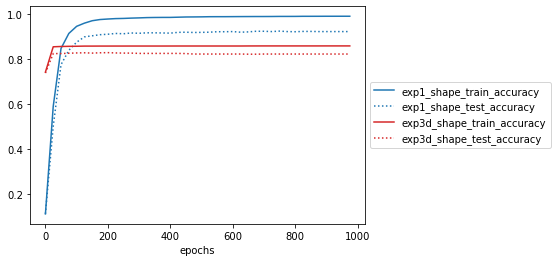

In [20]:
############# normal ################
datas1 = datas1.rename(columns={'shape_training_accuracy': 'exp1_shape_train_accuracy'})
datas1 = datas1.rename(columns={'size_training_accuracy': 'exp1_size_train_accuracy'})
datas1 = datas1.rename(columns={'color_training_accuracy': 'exp1_color_train_accuracy'})
datas1 = datas1.rename(columns={'shape_test_accuracy': 'exp1_shape_test_accuracy'})
datas1 = datas1.rename(columns={'size_test_accuracy': 'exp1_size_test_accuracy'})
datas1 = datas1.rename(columns={'color_test_accuracy': 'exp1_color_test_accuracy'})

# datas1 = datas1.rename(columns={'shape_training_accuracy': 'stage1_shape_train_accuracy'})
# datas1 = datas1.rename(columns={'size_training_accuracy': 'stage1_size_train_accuracy'})
# datas1 = datas1.rename(columns={'color_training_accuracy': 'stage1_color_train_accuracy'})
# datas1 = datas1.rename(columns={'shape_test_accuracy': 'stage1_shape_test_accuracy'})
# datas1 = datas1.rename(columns={'size_test_accuracy': 'stage1_size_test_accuracy'})
# datas1 = datas1.rename(columns={'color_test_accuracy': 'stage1_color_test_accuracy'})

datas2 = datas2.rename(columns={'shape_training_accuracy': 'exp3d_shape_train_accuracy'})
datas2 = datas2.rename(columns={'size_training_accuracy': 'exp3d_size_train_accuracy'})
datas2 = datas2.rename(columns={'color_training_accuracy': 'exp3d_color_train_accuracy'})
datas2 = datas2.rename(columns={'shape_test_accuracy': 'exp3d_shape_test_accuracy'})
datas2 = datas2.rename(columns={'size_test_accuracy': 'exp3d_size_test_accuracy'})
datas2 = datas2.rename(columns={'color_test_accuracy': 'exp3d_color_test_accuracy'})

# datas2 = datas2.rename(columns={'shape_training_accuracy': 'stage2_shape_train_accuracy'})
# datas2 = datas2.rename(columns={'size_training_accuracy': 'stage2_size_train_accuracy'})
# datas2 = datas2.rename(columns={'color_training_accuracy': 'stage2_color_train_accuracy'})
# datas2 = datas2.rename(columns={'shape_test_accuracy': 'stage2_shape_test_accuracy'})
# datas2 = datas2.rename(columns={'size_test_accuracy': 'stage2_size_test_accuracy'})
# datas2 = datas2.rename(columns={'color_test_accuracy': 'stage2_color_test_accuracy'})

ax = plt.gca()

datas1.plot(kind='line',x='epochs',y='exp1_shape_train_accuracy', color='#1f77b4', ax = ax)
# datas1.plot(kind='line',x='epochs',y='exp1_size_train_accuracy', color='#ff7f0e', ax = ax)
# datas1.plot(kind='line',x='epochs',y='exp1_color_train_accuracy', color='#2ca02c', ax = ax)

datas1.plot(linestyle=':',x='epochs',y='exp1_shape_test_accuracy', color='#1f77b4', ax = ax)
# datas1.plot(linestyle=':',x='epochs',y='exp1_size_test_accuracy', color='#ff7f0e', ax = ax)
# datas1.plot(linestyle=':',x='epochs',y='exp1_color_test_accuracy', color='#2ca02c', ax = ax)

datas2.plot(kind='line',x='epochs',y='exp3d_shape_train_accuracy', color='#d62728', ax = ax)
# datas2.plot(kind='line',x='epochs',y='exp3d_size_train_accuracy', color='#7f7f7f', ax = ax)
# datas2.plot(kind='line',x='epochs',y='exp3d_color_train_accuracy', color='#bcbd22', ax = ax)

datas2.plot(linestyle=':',x='epochs',y='exp3d_shape_test_accuracy', color='#d62728', ax = ax)
# datas2.plot(linestyle=':',x='epochs',y='exp3d_size_test_accuracy', color='#7f7f7f', ax = ax)
# datas2.plot(linestyle=':',x='epochs',y='exp3d_color_test_accuracy', color='#bcbd22', ax = ax)

###############################################################################################

# datas1.plot(kind='line',x='epochs',y='stage1_shape_train_accuracy', color='#1f77b4', ax = ax)
# # datas1.plot(kind='line',x='epochs',y='exp1_size_train_accuracy', color='#ff7f0e', ax = ax)
# # datas1.plot(kind='line',x='epochs',y='exp1_color_train_accuracy', color='#2ca02c', ax = ax)

# datas1.plot(linestyle=':',x='epochs',y='stage1_shape_test_accuracy', color='#1f77b4', ax = ax)
# # datas1.plot(linestyle=':',x='epochs',y='exp1_size_test_accuracy', color='#ff7f0e', ax = ax)
# # datas1.plot(linestyle=':',x='epochs',y='exp1_color_test_accuracy', color='#2ca02c', ax = ax)

# datas2.plot(kind='line',x='epochs',y='stage2_shape_train_accuracy', color='#d62728', ax = ax)
# # datas2.plot(kind='line',x='epochs',y='exp3d_size_train_accuracy', color='#7f7f7f', ax = ax)
# # datas2.plot(kind='line',x='epochs',y='exp3d_color_train_accuracy', color='#bcbd22', ax = ax)

# datas2.plot(linestyle=':',x='epochs',y='stage2_shape_test_accuracy', color='#d62728', ax = ax)
# # datas2.plot(linestyle=':',x='epochs',y='exp3d_size_test_accuracy', color='#7f7f7f', ax = ax)
# # datas2.plot(linestyle=':',x='epochs',y='exp3d_color_test_accuracy', color='#bcbd22', ax = ax)

plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()
# plt.savefig('figures/3d_omit_half_variant_second_stage_both_complete_compare_exp1_full_line',bbox_inches='tight')
# plt.savefig('figures/3d_omit_half_variant_test_complete_two_stage_shape_only_line',bbox_inches='tight')


In [ ]:
############# omit shape ##################
# non_tetro5_train = datas1.loc[: , ["tetromino1_training_accuracy", "monomino_training_accuracy", "domino_training_accuracy", "tromino1_training_accuracy",
#               "tromino2_training_accuracy", "tetromino2_training_accuracy", "tetromino3_training_accuracy",
#               "tetromino4_training_accuracy"]]
# datas1['non_tetro5_train'] = non_tetro5_train.mean(axis=1)
# datas1.insert(1, 'non_domino_train', non_domino_train.mean(axis=1), allow_duplicates=False)

# non_tetro5_test = datas1.loc[: , ['tetromino1_test_accuracy', 'monomino_test_accuracy',
#        'domino_test_accuracy', 'tromino1_test_accuracy',
#        'tromino2_test_accuracy',
#        'tetromino2_test_accuracy', 'tetromino3_test_accuracy',
#        'tetromino4_test_accuracy']]
# datas1['non_tetro5_test'] = non_tetro5_test.mean(axis=1)
# datas1.insert(2, 'non_domino_test', non_domino_test.mean(axis=1), allow_duplicates=False)

datas1 = datas1.rename(columns={'tetromino1_training_accuracy': 'exp1_tetromino1_train_accuracy'})
datas1 = datas1.rename(columns={'tetromino1_test_accuracy': 'exp1_tetromino1_test_accuracy'})
datas2 = datas2.rename(columns={'tetromino1_training_accuracy': 'exp3a_tetromino1_train_accuracy'})
datas2 = datas2.rename(columns={'tetromino1_test_accuracy': 'exp3a_tetromino1_test_accuracy'})

ax = plt.gca()
# datas1.plot(kind='line',x='epochs',y='non_tetro5_train', color='#1f77b4', ax = ax)
# datas1.plot(kind='line',x='epochs',y='size_training_accuracy', color='#ff7f0e', ax = ax)
# datas1.plot(kind='line',x='epochs',y='color_training_accuracy', color='#2ca02c', ax = ax)

# datas1.plot(linestyle=':',x='epochs',y='non_tetro5_test', color='#1f77b4', ax = ax)
# datas1.plot(linestyle=':',x='epochs',y='size_test_accuracy', color='#ff7f0e', ax = ax)
# datas1.plot(linestyle=':',x='epochs',y='color_test_accuracy', color='#2ca02c', ax = ax)

datas1.plot(kind='line',x='epochs',y='exp1_tetromino1_train_accuracy', color='#d62728', ax = ax)
datas1.plot(linestyle=':',x='epochs',y='exp1_tetromino1_test_accuracy', color='#d62728', ax = ax)

datas2.plot(kind='line',x='epochs',y='exp3a_tetromino1_train_accuracy', color='#bcbd22', ax = ax)
datas2.plot(linestyle=':',x='epochs',y='exp3a_tetromino1_test_accuracy', color='#bcbd22', ax = ax)

plt.show()
# plt.savefig('figures/3a_omit_tetro1_shape_second_stage_both_complete_line',bbox_inches='tight')



In [ ]:
############# omit color ##################
# non_red_train = datas1.loc[: , ['black_training_accuracy',
#        'green_training_accuracy', 'white_training_accuracy',
#        'yellow_training_accuracy', 'cyan_training_accuracy',
#        'magenta_training_accuracy', 'blue_training_accuracy']]
# datas1['non_red_train'] = non_red_train.mean(axis=1)

# non_red_test = datas1.loc[: , ['black_test_accuracy', 'green_test_accuracy', 'white_test_accuracy',
#        'yellow_test_accuracy', 'cyan_test_accuracy', 'magenta_test_accuracy',
#        'blue_test_accuracy']]
# datas1['non_red_test'] = non_red_test.mean(axis=1)

datas1 = datas1.rename(columns={'black_training_accuracy': 'exp1_black_train_accuracy'})
datas1 = datas1.rename(columns={'black_test_accuracy': 'exp1_black_test_accuracy'})
# datas1 = datas1.rename(columns={'shape_training_accuracy': 'shape_first_training_accuracy'})
# datas1 = datas1.rename(columns={'shape_test_accuracy': 'shape_first_test_accuracy'})
# datas1 = datas1.rename(columns={'size_training_accuracy': 'size_first_training_accuracy'})
# datas1 = datas1.rename(columns={'size_test_accuracy': 'size_first_test_accuracy'})

datas2 = datas2.rename(columns={'black_training_accuracy': 'exp3b_black_train_accuracy'})
datas2 = datas2.rename(columns={'black_test_accuracy': 'exp3b_black_test_accuracy'})
# datas2 = datas2.rename(columns={'shape_training_accuracy': 'shape_second_training_accuracy'})
# datas2 = datas2.rename(columns={'shape_test_accuracy': 'shape_second_test_accuracy'})
# datas2 = datas2.rename(columns={'size_training_accuracy': 'size_second_training_accuracy'})
# datas2 = datas2.rename(columns={'size_test_accuracy': 'size_second_test_accuracy'})

ax = plt.gca()
# datas1.plot(kind='line',x='epochs',y='non_black_train', color='#2ca02c', ax = ax)
# datas1.plot(kind='line',x='epochs',y='shape_first_training_accuracy', color='#1f77b4', ax = ax)
# datas1.plot(kind='line',x='epochs',y='size_first_training_accuracy', color='#ff7f0e', ax = ax)

# datas1.plot(linestyle=':',x='epochs',y='shape_first_test_accuracy', color='#1f77b4', ax = ax)
# datas1.plot(linestyle=':',x='epochs',y='size_first_test_accuracy', color='#ff7f0e', ax = ax)

# datas1.plot(linestyle=':',x='epochs',y='non_black_test', color='#2ca02c', ax = ax)
datas1.plot(kind='line',x='epochs',y='exp1_black_train_accuracy', color='#d62728', ax = ax)
datas1.plot(linestyle=':',x='epochs',y='exp1_black_test_accuracy', color='#d62728', ax = ax)

# datas2.plot(kind='line',x='epochs',y='shape_second_training_accuracy', color='#9467bd', ax = ax)
# datas2.plot(kind='line',x='epochs',y='size_second_training_accuracy', color='#7f7f7f', ax = ax)
# datas2.plot(linestyle=':',x='epochs',y='shape_second_test_accuracy', color='#9467bd', ax = ax)
# datas2.plot(linestyle=':',x='epochs',y='size_second_test_accuracy', color='#7f7f7f', ax = ax)

datas2.plot(kind='line',x='epochs',y='exp3b_black_train_accuracy', color='#bcbd22', ax = ax)
datas2.plot(linestyle=':',x='epochs',y='exp3b_black_test_accuracy', color='#bcbd22', ax = ax)

plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()
# plt.savefig('figures/3b_omit_black_second_stage_both_complete_1epo_line',bbox_inches='tight')
# plt.savefig('figures/4_2b_omit_black_second_stage_test_omit_only_color_line')



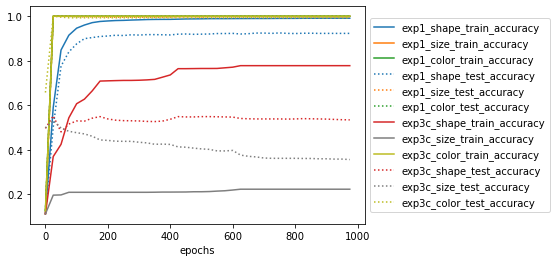

In [15]:
############# bottom vs. top ##############
# datas1 = df[['epochs',"shape_training_accuracy", "size_training_accuracy", "color_training_accuracy", 
#             "shape_test_accuracy", "size_test_accuracy","color_test_accuracy"]]

datas1 = datas1.rename(columns={'shape_training_accuracy': 'exp1_shape_train_accuracy'})
datas1 = datas1.rename(columns={'size_training_accuracy': 'exp1_size_train_accuracy'})
datas1 = datas1.rename(columns={'color_training_accuracy': 'exp1_color_train_accuracy'})
datas1 = datas1.rename(columns={'shape_test_accuracy': 'exp1_shape_test_accuracy'})
datas1 = datas1.rename(columns={'size_test_accuracy': 'exp1_size_test_accuracy'})
datas1 = datas1.rename(columns={'color_test_accuracy': 'exp1_color_test_accuracy'})

datas2 = datas2.rename(columns={'shape_training_accuracy': 'exp3c_shape_train_accuracy'})
datas2 = datas2.rename(columns={'size_training_accuracy': 'exp3c_size_train_accuracy'})
datas2 = datas2.rename(columns={'color_training_accuracy': 'exp3c_color_train_accuracy'})
datas2 = datas2.rename(columns={'shape_test_accuracy': 'exp3c_shape_test_accuracy'})
datas2 = datas2.rename(columns={'size_test_accuracy': 'exp3c_size_test_accuracy'})
datas2 = datas2.rename(columns={'color_test_accuracy': 'exp3c_color_test_accuracy'})

ax = plt.gca()
datas1.plot(kind='line',x='epochs',y='exp1_shape_train_accuracy', color='#1f77b4', ax = ax)
datas1.plot(kind='line',x='epochs',y='exp1_size_train_accuracy', color='#ff7f0e', ax = ax)
datas1.plot(kind='line',x='epochs',y='exp1_color_train_accuracy', color='#2ca02c', ax = ax)

datas1.plot(linestyle=':',x='epochs',y='exp1_shape_test_accuracy', color='#1f77b4', ax = ax)
datas1.plot(linestyle=':',x='epochs',y='exp1_size_test_accuracy', color='#ff7f0e', ax = ax)
datas1.plot(linestyle=':',x='epochs',y='exp1_color_test_accuracy', color='#2ca02c', ax = ax)

datas2.plot(kind='line',x='epochs',y='exp3c_shape_train_accuracy', color='#d62728', ax = ax)
datas2.plot(kind='line',x='epochs',y='exp3c_size_train_accuracy', color='#7f7f7f', ax = ax)
datas2.plot(kind='line',x='epochs',y='exp3c_color_train_accuracy', color='#bcbd22', ax = ax)

datas2.plot(linestyle=':',x='epochs',y='exp3c_shape_test_accuracy', color='#d62728', ax = ax)
datas2.plot(linestyle=':',x='epochs',y='exp3c_size_test_accuracy', color='#7f7f7f', ax = ax)
datas2.plot(linestyle=':',x='epochs',y='exp3c_color_test_accuracy', color='#bcbd22', ax = ax)

plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()
# plt.savefig('figures/3c_top_bottom_second_stage_both_complete_full_line',bbox_inches='tight')
